<a href="https://colab.research.google.com/github/prabalpandey2411/220940325048_Prabal_Pandey/blob/main/Customer_Segmentation_for_Marketing_Campaigns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn matplotlib seaborn


In [17]:
import pandas as pd

# Upload the dataset
from google.colab import files
uploaded = files.upload()

# !wget "https://www.kaggle.com/datasets/shwetabh123/mall-customers"





Saving Mall_Customers.csv to Mall_Customers.csv


In [18]:
!ls

 mall-customers       mall-customers-dataset	'mall-customers-dataset?resource=download'
 Mall_Customers.csv   mall-customers-dataset.1	 sample_data


In [19]:
# Load the dataset
data = pd.read_csv('Mall_Customers.csv')  # Replace with your file name
print(data.head())
print(data.info())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [22]:
# Check for missing values
print(data.isnull().sum())

# Fill or drop missing values
numeric_data = data.select_dtypes(include=['number'])
data.fillna(numeric_data.mean(), inplace=True)


CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [25]:
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')
print(data.describe())

       customerid         age  annual_income_(k$)  spending_score_(1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [26]:
# Select features (e.g., Annual Income and Spending Score)
features = data[['annual_income_(k$)', 'spending_score_(1-100)']]


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


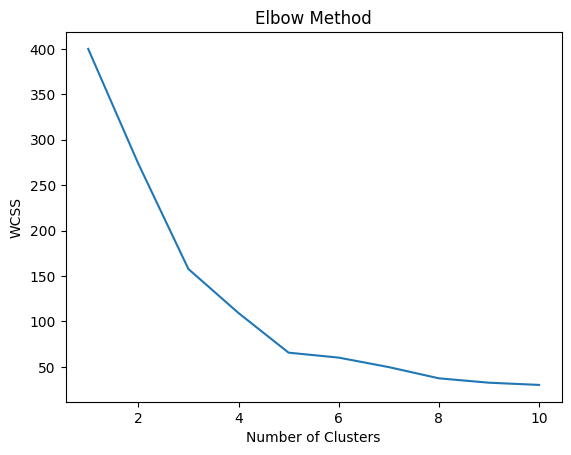

In [28]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [29]:
# Choose optimal clusters (e.g., 5)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to the original data
data['cluster'] = clusters


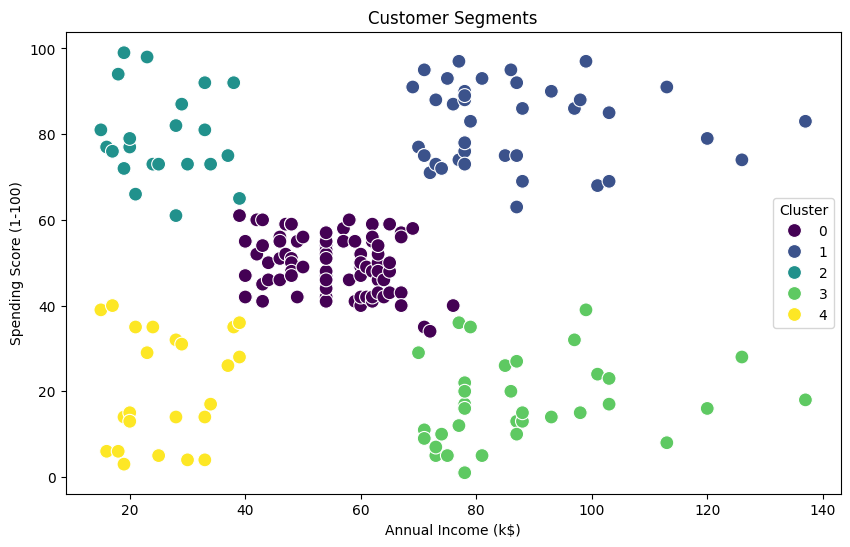

In [30]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=features['annual_income_(k$)'],
    y=features['spending_score_(1-100)'],
    hue=data['cluster'],
    palette='viridis',
    s=100
)
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()


In [32]:
# Summarize clusters
cluster_summary = data.groupby('cluster').agg({
    'annual_income_(k$)': 'mean',
    'spending_score_(1-100)': 'mean',
    'age': 'mean',  # Add other numeric columns as needed
    'genre': lambda x: x.value_counts().index[0]  # Get the most frequent category for 'genre'
    # Add other relevant aggregations for other columns
})
print(cluster_summary)

         annual_income_(k$)  spending_score_(1-100)        age   genre
cluster                                                               
0                 55.296296               49.518519  42.716049  Female
1                 86.538462               82.128205  32.692308  Female
2                 25.727273               79.363636  25.272727  Female
3                 88.200000               17.114286  41.114286    Male
4                 26.304348               20.913043  45.217391  Female


Cluster 0: High income, high spending.
Cluster 1: Low income, low spending.
Cluster 2: Moderate income, average spending.

In [34]:
# Summarize clusters, excluding non-numeric columns
cluster_summary = data.groupby('cluster').agg({
    'annual_income_(k$)': 'mean',
    'spending_score_(1-100)': 'mean',
    'age': 'mean',
    'genre': lambda x: x.value_counts().index[0] # Get the most frequent category for 'genre'
})
print(cluster_summary)

         annual_income_(k$)  spending_score_(1-100)        age   genre
cluster                                                               
0                 55.296296               49.518519  42.716049  Female
1                 86.538462               82.128205  32.692308  Female
2                 25.727273               79.363636  25.272727  Female
3                 88.200000               17.114286  41.114286    Male
4                 26.304348               20.913043  45.217391  Female


In [35]:
data.to_csv('clustered_customers.csv', index=False)
from google.colab import files
files.download('clustered_customers.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Use Clusters for Marketing Campaigns
Actions:
Target high-income, high-spending customers for premium products.
Create retention campaigns for moderate-income groups.
Offer discounts to low-income, low-spending customers.